Clustering: Hierarchical
Dataset: Cities_r2.csv
Apply Data pre-processing (Label Encoding , Data
Transformation….) techniques if necessary.
Apply Hierarchical clusteringalgorithms (based on
effective_literacy_rate_total column) to find the group of customers.
Chit 6 and 8 just have differnt datasets

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving cities_r2.csv to cities_r2.csv


In [3]:
df=pd.read_csv("cities_r2.csv")
df_cluster = df[['effective_literacy_rate_total']].dropna()

In [4]:
scaler = StandardScaler()
df_cluster_scaled = scaler.fit_transform(df_cluster)

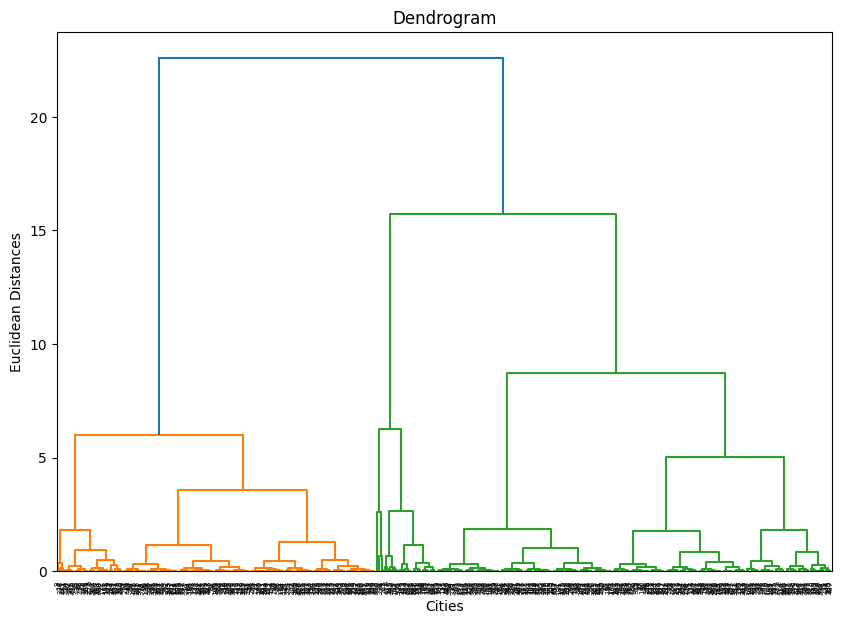

In [5]:
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(df_cluster_scaled, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Cities')
plt.ylabel('Euclidean Distances')
plt.show()

In [6]:
optimal_clusters = 3  # Adjust based on the dendrogram
hierarchical_clustering = AgglomerativeClustering(n_clusters=optimal_clusters, linkage='ward')
df['Cluster'] = hierarchical_clustering.fit_predict(df_cluster_scaled)

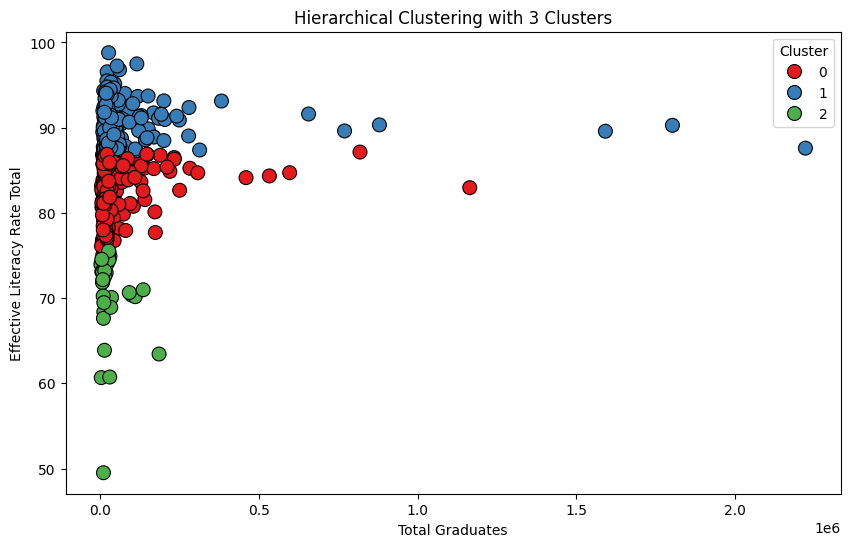

In [7]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['total_graduates'], y=df['effective_literacy_rate_total'],
                hue=df['Cluster'], palette='Set1', s=100, edgecolor='black')
plt.title(f'Hierarchical Clustering with {optimal_clusters} Clusters')
plt.xlabel('Total Graduates')
plt.ylabel('Effective Literacy Rate Total')
plt.legend(title='Cluster')
plt.show()